# Credit Card Fraud detection using Logistic Regression

In [ ]:
#Read the data set.
#Do data pre-processing.
#Split the data into train and test.
#Build the logistic model.
#Train the classifier.
#Test the classifier with test data.
#Measure precision,recall and f1-score and accuracy of the model.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv('creditcard.csv')

In [3]:
#identifying dependent and independent varaible
X = data.iloc[:, 1:30].columns
y = data['Class']
X = data[X]
dim(X)

In [4]:
count = data['Class'].value_counts()
print("Total count in each class\n\n",count)
print("\n")

Total count in each class

 0    284315
1       492
Name: Class, dtype: int64




In [5]:
#splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Build the model
clf = LogisticRegression()

In [7]:
# Train the classifier
clf.fit(X_train, y_train)

C:\Users\mozhi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [8]:
#test the model
y_pred = clf.predict(X_test)

In [3]:
#classification report
from sklearn.metrics import classification_report
cr = (classification_report(y_test, y_pred))

NameError: name 'y_test' is not defined

In [10]:
#confusion matrix
cm = (metrics.confusion_matrix(y_test, y_pred))
print("Confusion Matrix:\n\n",cm,"\n")

Confusion Matrix:

 [[56855     9]
 [   42    56]] 



In [11]:
#classification report
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.57      0.69        98

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.93      0.79      0.84     56962
weighted avg       1.00      1.00      1.00     56962



In [12]:
#Accuracy score
a= (metrics.accuracy_score(y_test, y_pred))
print("Accuracy score:",round(a,1))

Accuracy score: 1.0


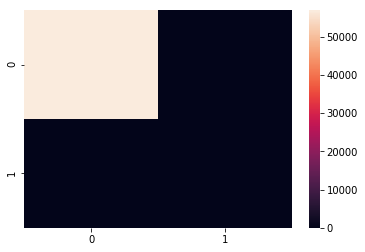

In [13]:
#heat map for confusion matrix
#fig, ax = plt.subplots(figsize=(7,4))
sns.heatmap(cm)#, annot=True, fmt='d')
plt.show()

In [ ]:
#print the actual and predicted labels
df1 = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})
print(df1.head(25))

In [ ]:
#ROC curve evaluation
print("Roc Curve evaluation")
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data, auc="+str(auc))
plt.legend(loc=4)
plt.show()